In [4]:
import pandas as pd
import numpy as np

In [5]:
# Create sample data for green transportation system
data = pd.DataFrame({
    'fuel_efficiency': [25.5, 30.2, 28.1, 35.4, 32.8],
    'emissions': [150, 120, 135, 95, 110],
    'speed': [80, 95, 85, 100, 90],
    'distance': [500, 600, 550, 700, 620]
})

# Optionally, save to CSV for later use
data.to_csv('green transportation system.csv', index=False)

In [6]:
data = pd.read_csv('green transportation system.csv')
data.head()

,fuel_efficiency,emissions,speed,distance
0,25.5,150,80,500
1,30.2,120,95,600
2,28.1,135,85,550
3,35.4,95,100,700
4,32.8,110,90,620


In [7]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# Convert the scaled data into a DataFrame for easier analysis
scaled_data = pd.DataFrame(data_scaled, columns=data.columns)
# Display the standardized data
print(scaled_data.head())

   fuel_efficiency  emissions     speed  distance
0        -1.413331   1.463583 -1.414214 -1.394468
1        -0.057687  -0.104542  0.707107  0.089009
2        -0.663400   0.679521 -0.707107 -0.652730
3         1.442174  -1.411313  1.414214  1.572486
4         0.692244  -0.627250  0.000000  0.385704


In [8]:
from sklearn.decomposition import PCA
# Initialize PCA
pca = PCA()
# Fit PCA on the scaled data
pca.fit(data_scaled)
# Explained variance ratio for each principal component
print("Explained variance ratio for each principal component:")
print(pca.explained_variance_ratio_)
# Cumulative explained variance
print("\nCumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_))

Explained variance ratio for each principal component:
[9.67230758e-01 3.08917763e-02 1.87006631e-03 7.39983158e-06]

Cumulative explained variance:
[0.96723076 0.99812253 0.9999926  1.        ]


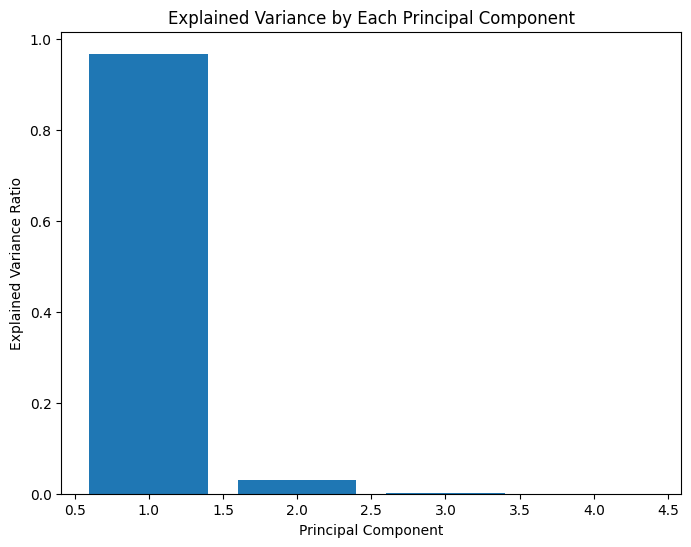

In [9]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

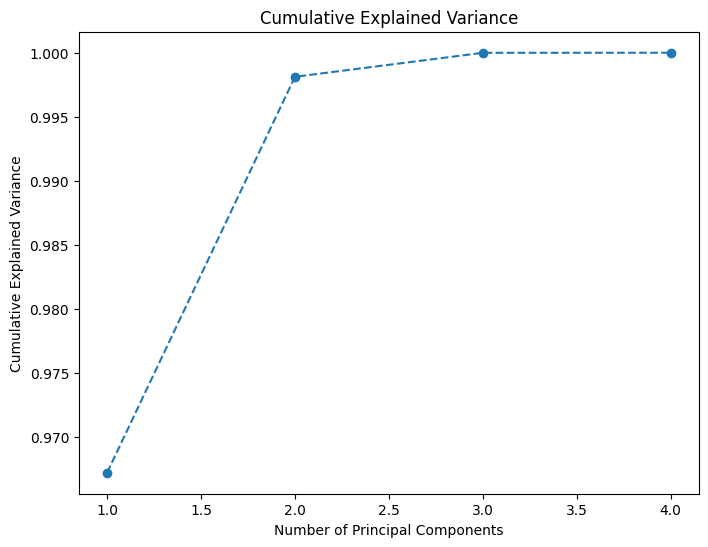

In [10]:
# Cumulative explained variance plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

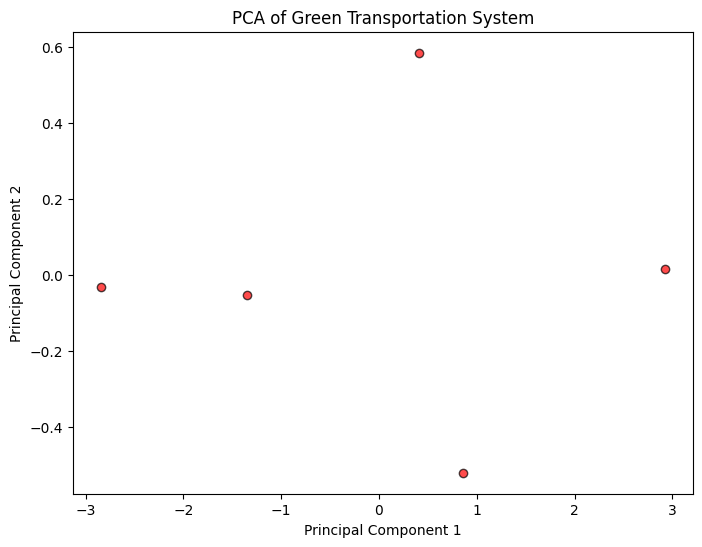

In [11]:
# Project the data onto the first two principal components
data_pca = pca.transform(data_scaled)
# Create a DataFrame with the first two principal components
pca_df = pd.DataFrame(data_pca[:, :2], columns=['PC1', 'PC2'])
# Visualize the data in 2D space using the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='red', edgecolors='k', alpha=0.7)
plt.title('PCA of Green Transportation System')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()